# Problem set 4
## 1. PCA of x & y data
a. Standardise your data manually

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# import the data 
fname = "/home/esmee/Documents/DBDM/DDM2017-master/Datasets/x-vs-y-for-PCA.csv"
data = pd.read_csv(fname)

#standardizing the data 
def standardize(x):
    """Standardize the data according to 
    x_i = (x_i - x_mean) / x_std """
    return (x - np.mean(x))/np.std(x)

x_st = standardize(data["x"])
y_st = standardize(data["y"])


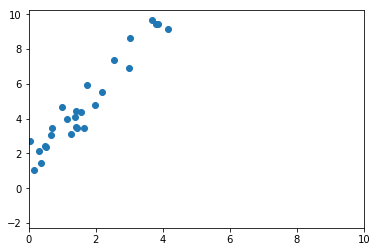

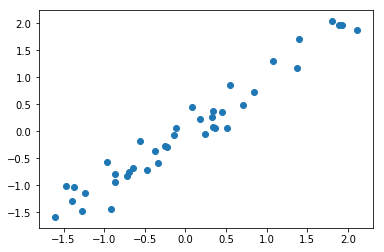

In [17]:
# plot the original data
plt.scatter(data["x"], data["y"])
plt.xlim(0, 10)
plt.show()
# plot the standardized data
plt.scatter(standardize(data["x"]), standardize(data["y"]))
plt.show()

b) Calculate the covariance matrix of the standardised data (see the math reminder document if you
are unsure how to do this). I will call this covariance matrix ! C x in the following. Compare the
covariance matrix with a plot of the data and see whether it makes sense to you.

$$C_x = \frac{1}{N} \sum_{n=1}^{N} (x_{i,n} - \bar{x})(x_{j,n} - \bar{x_j})$$

In [50]:
# Make the covariance matrix
N = len(x_st)
Cx = np.zeros((2,2))
d = [x_st, y_st]


for i in range(2):
    for j in range(2):
        Cx[i,j] = np.sum((d[i] - np.mean(d[i]))*(d[j] - np.mean(d[j])))/N

print "Covariance matrix Cx: "
print Cx


Covariance matrix Cx: 
[[ 1.         0.9722537]
 [ 0.9722537  1.       ]]


c) Calculate the eigenvalues and eigenvectors of $C_x$. How many eigenvalues are significant do
you feel? The first eigenvector for me was (0.7071, 0.7071), check that you get something similar.

$$ C_x = V \Lambda V^{T}$$

In [51]:
# calculate the eigenvalues
lam, v = np.linalg.eig(Cx)
v1, v2 = zip(*v)
print "The eigenvalues are: \n {}".format(lam)
print "The eigenvectors are: \n {0} \n {1}".format(v1, v2)


The eigenvalues are: 
 [ 1.9722537  0.0277463]
The eigenvectors are: 
 (0.70710678118654746, 0.70710678118654746) 
 (-0.70710678118654746, 0.70710678118654746)


d) Plot the eigenvectors over the original (not the standardised) data.

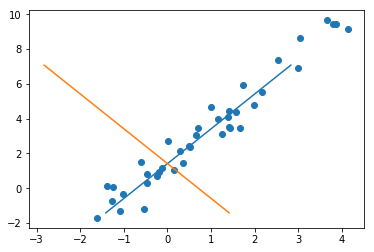

In [56]:
plt.scatter(data["x"], data["y"])
n1 = np.linspace(-2, 4)
n2 = np.linspace(-2, 10)
plt.plot(v1[0]*n1, v1[1]*n2)
plt.plot(v2[0]*n1, v2[1]*n2)


plt.show()

e) Calculate the eigen-components of the data. To do this, you need to combine the eigenvectors
you want to use into a matrix (in this case all), and then matrix multiply this with the coordinates
of each point to get the projected points.
For simplicity you can do this in a loop, in which case my loop looks like (v is my matrix of eigenvectors and xw and yw are the standardized data).

    for i in range(len(xw)):
        pcs[:, i] = np.matmul(v.T, np.array([xw[i], yw[i]]).T)

Plot the resulting PC1 and PC2 axes - does this look like what you expected?

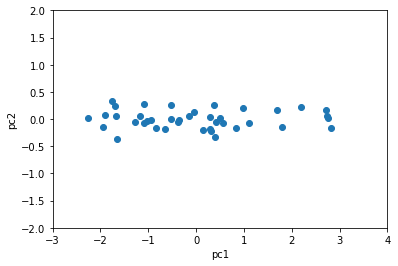

In [76]:
# The new axis are v * [x,y]
pc1, pc2 = np.dot(v.T, [x_st, y_st])

# Plot the projected data
plt.scatter(pc1, pc2)
plt.xlim(-3, 4)
plt.ylim(-2, 2)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

f) Project the data onto only one axis. In this case you use only one eigenvector in your matrix, but otherwise it works the same as e). Let us call these transformed data PC1. Now project PC1 back to the original space - to do that, you multiply PC1 with the matrix you used for the projection.

So if your eigenvector is ev1, you have 
    $$x = PC1*ev1[0]$$ and $$y=PC1*ev1[1] $$
(plus you need to undo the standardizing but that should be straightforward.

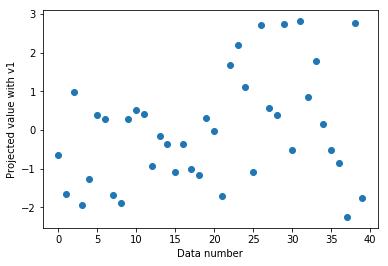

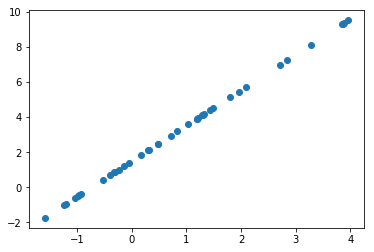

In [91]:
# Project the data to 1 axis
pc1 = np.dot(v.T[0], [x_st, y_st])

plt.scatter(range(0, len(pc1)), pc1)
plt.xlabel("Data number")
plt.ylabel("Projected value with v1")
plt.show()

# Project it back to the original space
x = pc1 * v1[0]
y = pc1 * v1[1]

# Undo the standardizing
x = x * np.std(data["x"]) + np.mean(data["x"])
y = y * np.std(data["y"]) + np.mean(data["y"])

plt.scatter(x,y)
plt.show()

g) Finally, we can do the same using the PCA module in sklearn. To do that we have to import two packages:

    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler

We make a PCA object - note that we need to specify the number of components at the outset:

    pca = PCA(whiten=False, n_components=2)
    
we create a X variable and standardize it:

    X = np.vstack([x, y]).T
    scl = StandardScaler()
    Xs = scl.fit_transform(X)
    
and run the PCA on these data:

    pca.fit(Xs)

and the eigenvectors are now stored in the pca.components_ element:

    ev1_1, ev2_1 = zip(*pca.components_.T)
    ev1_1, np.array(ev1)*std_x

Now you can do the same as problem f) using this package - you will most likely want to use the inverse_transform function in pca and also in scl to get back to the original space.

[-0.64848272  0.17352675]


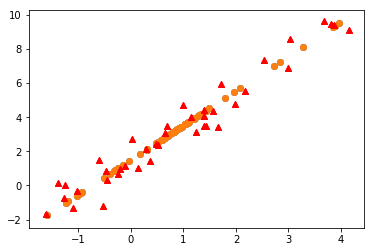

In [96]:
# Make a PCA object
pca = PCA(whiten = False, n_components = 2)

# Make the X variable and standardize it
X = np.vstack([data["x"], data["y"]]).T
scl = StandardScaler()
Xs = scl.fit_transform(X)

# Run the PCA on the data
pca.fit(Xs)

# The eigenvectors
ev1, ev2 = zip(*pca.components_.T)

Xs_back = pca.inverse_transform(Xs)
print Xs_back[0]

plt.scatter(Xs_back*ev1[0]*np.std(data['x']) + np.mean(data['x']), Xs_back*ev1[1]*np.std(data['y']) + np.mean(data['y']))
plt.plot(data['x'], data['y'], 'r^')
plt.show()


# 2. Exploring higher dimensional PCA
 The file Datasets/xyzw-for-PCA.csv contains index, x, y,z & w variables for a simple synthetic dataset. The data was created using the code in code-for-xyzw.py and the unrotated data in Datasets/xyzw-for-PCA-no-rotation.csv shwos what it looks like if the coordinate axes are well chosen.
 
 a) Run PCA on these data after standardizing them. What is the effective dimension of the data. Plot the transformed data in 4D and 2D.

In [28]:
# Read in data
fname = "/home/esmee/Documents/DBDM/DDM2017-master/Datasets/xyzw-for-PCA.csv"
t = pd.read_csv(fname)
print t.columns
x, y, z, w = t["X"], t["Y"], t["Z"], t["W"]

Index([u'Unnamed: 0', u'X', u'Y', u'Z', u'W'], dtype='object')


In [29]:
# Standardize the data (needed for alogirthms to work)
X = np.vstack([x,y,z,w]).T #x,y,z and w resp. in column 0, 1, 2 and 3
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

In [31]:
# Run PCA on the data
pca = PCA(n_components = 4)
pca.fit(X_st)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[[ 0.10122499  0.72126427 -0.68455118 -0.0303486 ]
 [ 0.90765038  0.19691483  0.34741874 -0.12921131]
 [ 0.12233865  0.04619842  0.02282515  0.99114982]
 [ 0.38853256 -0.66247122 -0.64044431 -0.0023298 ]]


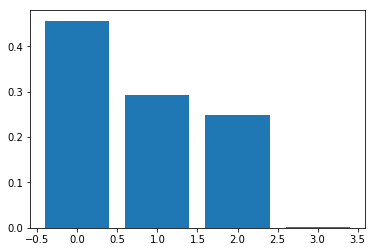

In [34]:
# show the importance of the components
print pca.components_
plt.bar( np.arange( len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()


In [55]:
# Get the eigenvectors of the components
ev1, ev2, ev3, ev4 = zip(*pca.components_.T)

# Only use the first 2 to get a 2D plot
X_back2 = pca.inverse_transform(X_st)[:, :2] #only use X and Y data
E = np.vstack([ev1[:2], ev2[:2]]).T

In [60]:
# Project data on the eigenvectors
X_new = np.dot(X_back2, E)
x_new, y_new = X_new[:, 0], X_new[:, 1]

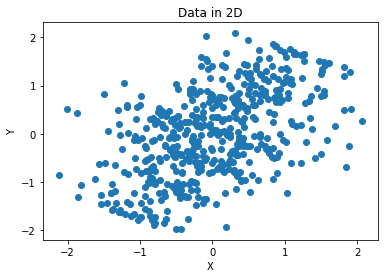

In [65]:
plt.scatter(x_new, y_new)
plt.title("Data in 2D")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

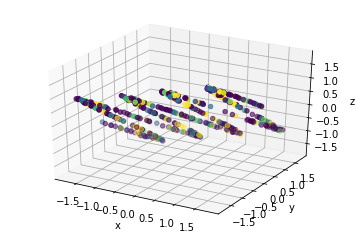

In [92]:
# Plot in 4D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
#ax_view_init(45, 60)

ax.scatter(X_st[:,0], X_st[:,1], X_st[:,2], c=cm.viridis(X_st[:,3]))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

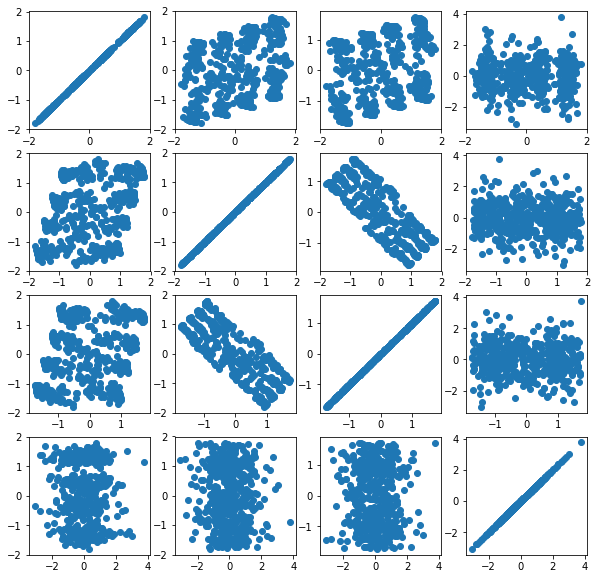

In [91]:
# make 4 by 4 plots of the data
fig, axes = plt.subplots(4, 4, figsize=(10, 10))


for i in range(4):
    for j in range(4):
        axes[i,j].scatter(X_st[:,i], X_st[:,j])
plt.show()

b) Run the PCA on these data without standardizing them. What does the results look like?

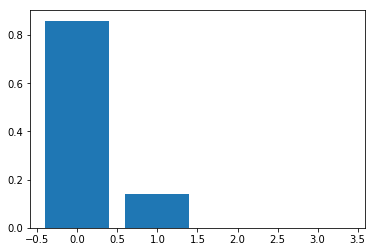

In [93]:
# Run PCA on the data
X = np.vstack([x,y,z,w]).T
pca = PCA(n_components = 4)
pca.fit(X)

# show the importance of the components
plt.bar( np.arange( len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

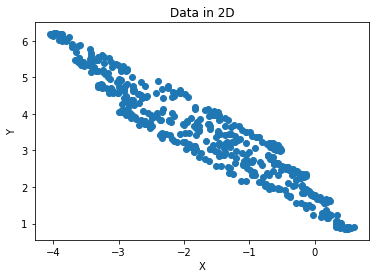

In [95]:
# Get the eigenvectors of the components
ev1, ev2, ev3, ev4 = zip(*pca.components_.T)

# Only use the first 2 to get a 2D plot
X2 = X[:, :2]
E = np.vstack([ev1[:2], ev2[:2]]).T

# Project data on the eigenvectors
X_new = np.dot(X2, E)
x_new, y_new = X_new[:, 0], X_new[:, 1]

plt.scatter(x_new, y_new)
plt.title("Data in 2D")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



# 3. PCA on the fundamental plane

The fundamental plane of elliptical galaxies is a relationship between the velocity dispersion, $\log \sigma$, the effective radius, $\log R_{e}$, and the surface brightness, $\log \mu_{e}$. Here we will do a PCA analysis of a set of these data to see how well such an algorithm can find this plane.

a) Start by getting the "SMAC. III. Fundamental Plane catalog" from Hudson et al (2001) from Vizier - you want the standardised data catalogue with 699 rows.